Template Matching

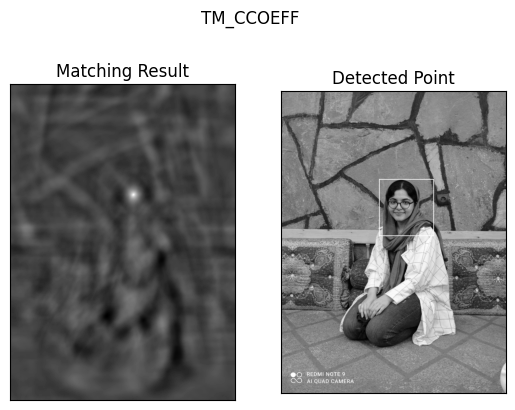

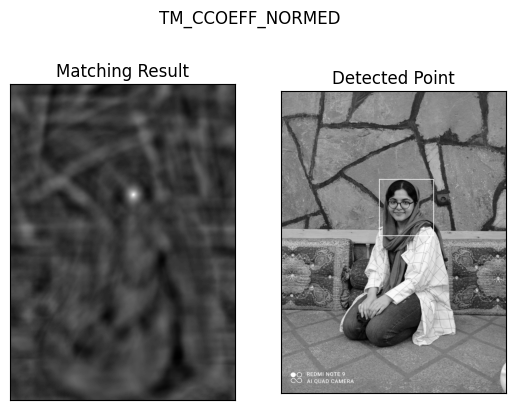

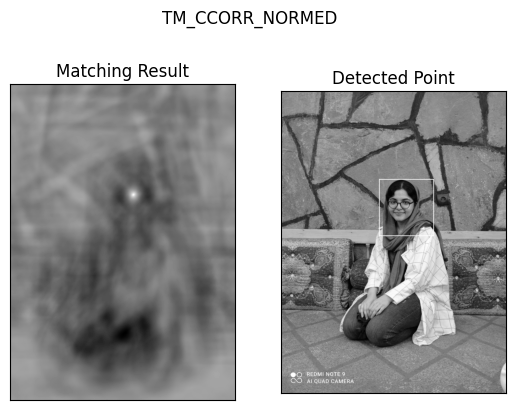

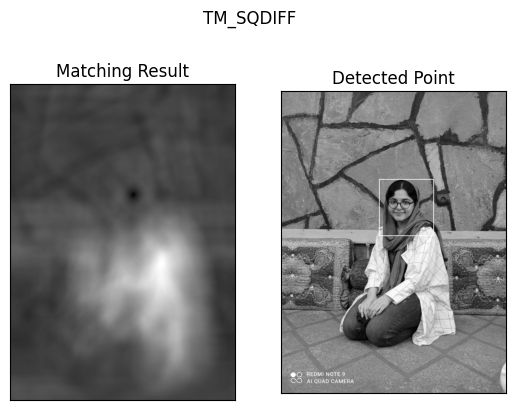

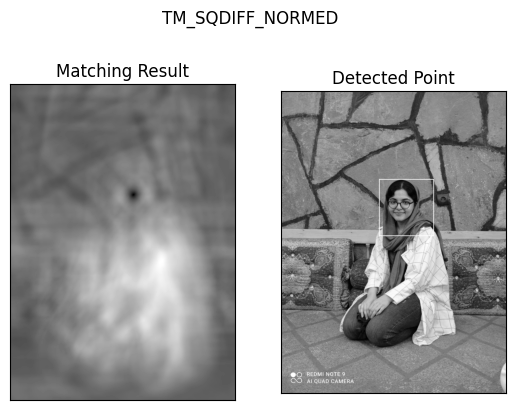

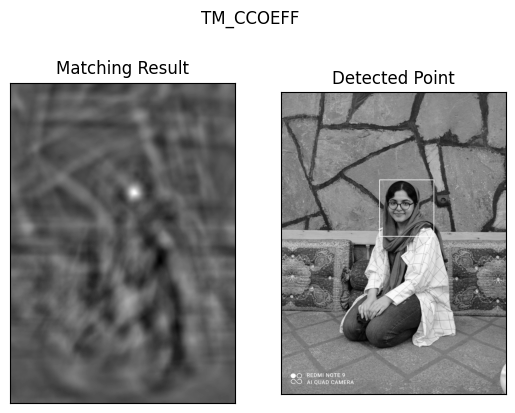

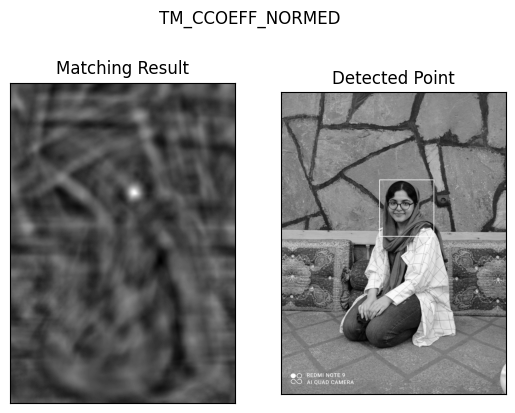

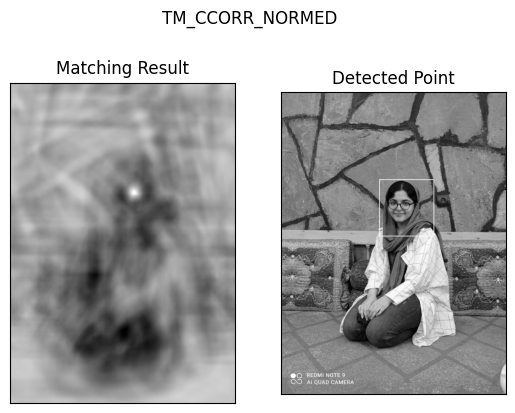

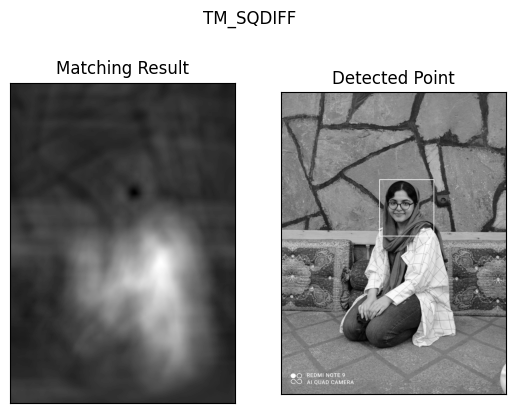

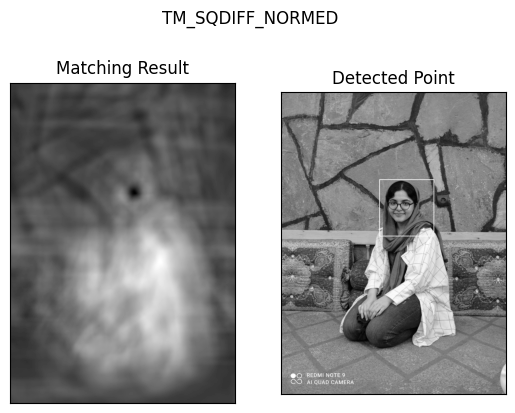

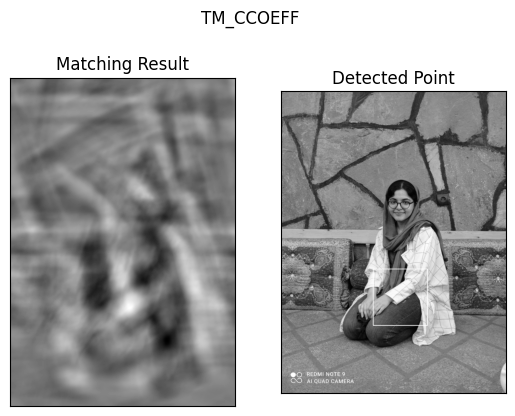

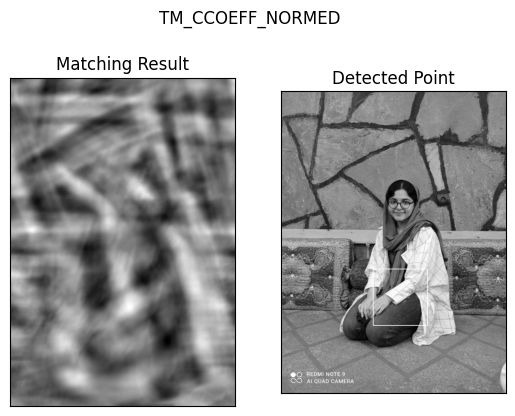

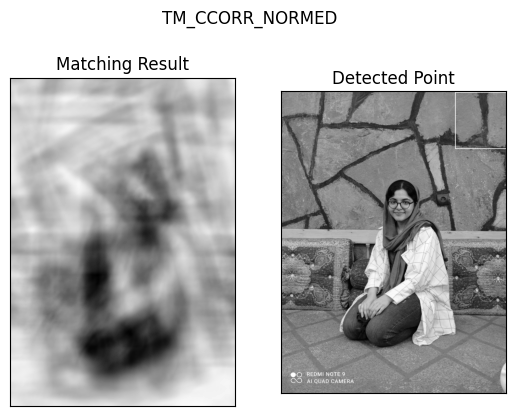

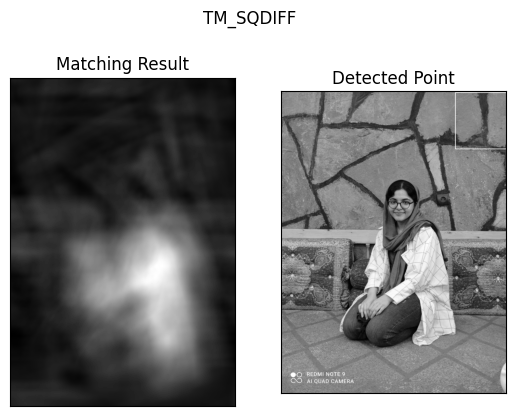

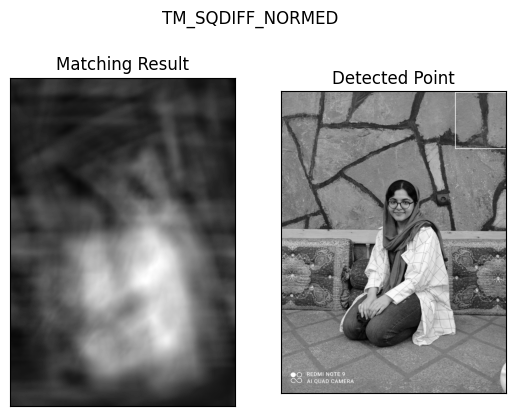

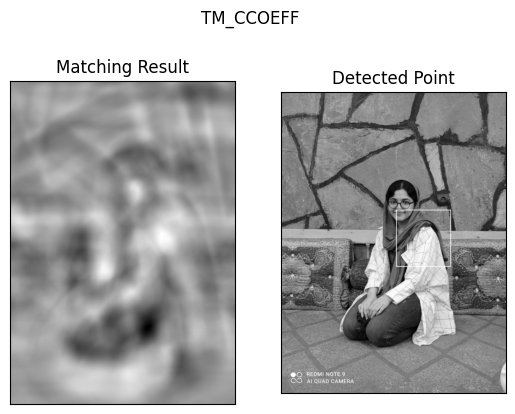

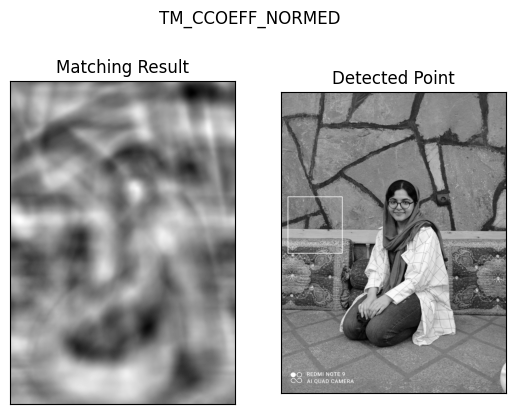

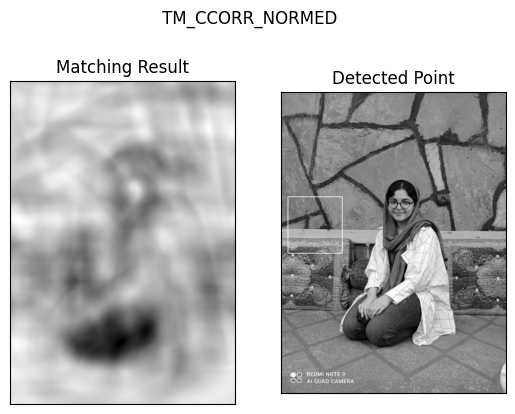

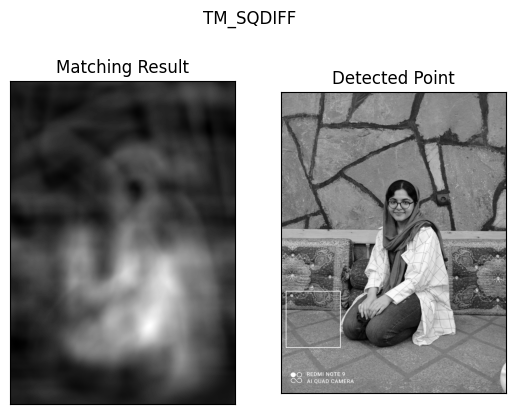

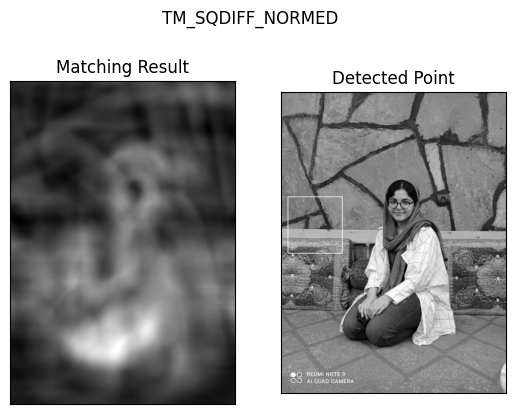

In [11]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('1.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()

templates = []
template1 = cv.imread('2.jpg', cv.IMREAD_GRAYSCALE)
assert template1 is not None, "file could not be read, check with os.path.exists()"
w, h = template1.shape[::-1]
templates.append(template1)

template2 = cv.imread('32.jpg', cv.IMREAD_GRAYSCALE)
assert template2 is not None, "file could not be read, check with os.path.exists()"
w, h = template2.shape[::-1]
templates.append(template2)
 
template3 = cv.imread('3.jpg', cv.IMREAD_GRAYSCALE)
assert template3 is not None, "file could not be read, check with os.path.exists()"
w, h = template3.shape[::-1]
templates.append(template3)

template4 = cv.imread('4.jpg', cv.IMREAD_GRAYSCALE)
assert template4 is not None, "file could not be read, check with os.path.exists()"
w, h = template4.shape[::-1]
templates.append(template4)

# methods = ['TM_CCOEFF']
methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']

for template in templates:
    for meth in methods:
        img = img2.copy()
        method = getattr(cv, meth) 
        res = cv.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
    
        cv.rectangle(img,top_left, bottom_right, 255, 2)
    
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(img,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(meth)

        plt.show()

In [9]:
import cv2
import numpy as np

# Load the source and template images
source_image = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
template_image = cv2.imread('3.jpg', cv2.IMREAD_GRAYSCALE)

# Get dimensions of the template
w, h = template_image.shape[::-1]

# Perform template matching with a method (e.g., cv2.TM_CCOEFF_NORMED)
result = cv2.matchTemplate(source_image, template_image, cv2.TM_CCOEFF_NORMED)

# Set a threshold to consider areas as matching
threshold = 0.8  # Adjust this value as needed (0 to 1 for TM_CCOEFF_NORMED)

# Find locations where the similarity score meets or exceeds the threshold
locations = np.where(result >= threshold)

# Draw rectangles around matched regions on the source image
for pt in zip(*locations[::-1]):  # Reverse order for (x, y) coordinates
    cv2.rectangle(source_image, pt, (pt[0] + w, pt[1] + h), (255, 0, 0), 2)

cv.imwrite("template.jpg", source_image)

True